In [162]:
import warnings
warnings.filterwarnings("ignore") 

import numpy as np
import pandas as pd

import nltk    #Natural language processing tool-kit
nltk.download('stopwords')
  
from nltk.corpus import stopwords                   #Stopwords corpus

from keras.datasets import imdb
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/agatheguilloux/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Import des données

In [163]:
filename = "./sentiment_labelled_sentences/imdb_labelled.txt"

df = pd.read_csv(filename, sep="\t")
df.columns = ["sentence", "label"]

print("shape", df.shape)

shape (747, 2)


In [164]:
df.head()

,sentence,label
0,Not sure who was more lost - the flat characte...,0
1,Attempting artiness with black & white and cle...,0
2,Very little music or anything to speak of.,0
3,The best scene in the movie was when Gerardo i...,1
4,"The rest of the movie lacks art, charm, meanin...",0


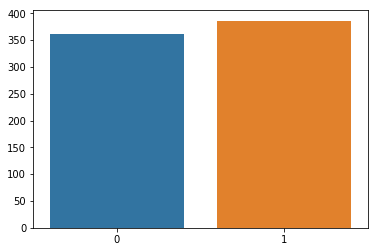

In [165]:
sns.barplot(np.unique(df['label']),df.groupby('label').count().values[:,0])

## Bag of words 

### Sur un sous-jeu de données

In [166]:
X_sub = df['sentence'][0:10]

On crée un dictionnaire, puis on compte le nombre d'apparition des mots du dictionnaire dans chaque texte (critique)

In [167]:
count_vect = CountVectorizer()
X_sub_counts = count_vect.fit_transform(X_sub)
dictionary_sub   = count_vect.get_feature_names()
print(dictionary_sub)

['about', 'acting', 'adorable', 'almost', 'and', 'angles', 'anything', 'art', 'artiness', 'as', 'attempting', 'audience', 'baby', 'became', 'because', 'best', 'bit', 'black', 'buffet', 'camera', 'casting', 'characters', 'charm', 'clever', 'disappointed', 'effort', 'emptiness', 'empty', 'even', 'existent', 'find', 'flat', 'for', 'gerardo', 'good', 'guess', 'half', 'head', 'his', 'hours', 'if', 'in', 'is', 'it', 'jimmy', 'keeps', 'kids', 'lacks', 'lines', 'little', 'lost', 'loved', 'meaning', 'messages', 'more', 'movie', 'music', 'nearly', 'non', 'not', 'of', 'or', 'out', 'owls', 'plot', 'poor', 'predictable', 'rest', 'ridiculous', 'running', 'saw', 'scene', 'science', 'song', 'speak', 'sure', 'teacher', 'that', 'the', 'those', 'thought', 'through', 'to', 'today', 'trying', 'two', 'very', 'walked', 'was', 'wasted', 'were', 'when', 'white', 'who', 'whom', 'with', 'works']


In [168]:
print(count_vect.vocabulary_.get(u'who'))

93


In [169]:
print(X_sub_counts.shape) 
print(X_sub_counts[0])
print(type(X_sub_counts))

(10, 97)
  (0, 62)	1
  (0, 87)	1
  (0, 94)	1
  (0, 60)	1
  (0, 36)	1
  (0, 57)	1
  (0, 11)	1
  (0, 61)	1
  (0, 21)	1
  (0, 31)	1
  (0, 78)	2
  (0, 50)	1
  (0, 54)	1
  (0, 88)	1
  (0, 93)	1
  (0, 75)	1
  (0, 59)	1
<class 'scipy.sparse.csr.csr_matrix'>


In [170]:
print(X_sub_counts.toarray()[0,:])

[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 2 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0]


In [171]:
word_counts = pd.DataFrame(X_sub_counts.toarray(),columns = dictionary_sub)
word_total_counts = pd.DataFrame()
word_total_counts['count'] = word_counts.sum(axis=0)
word_total_counts['word'] = dictionary_sub

In [172]:
word_total_counts_sorted_top  = word_total_counts.sort_values(by="count",ascending = False).iloc[0:20]

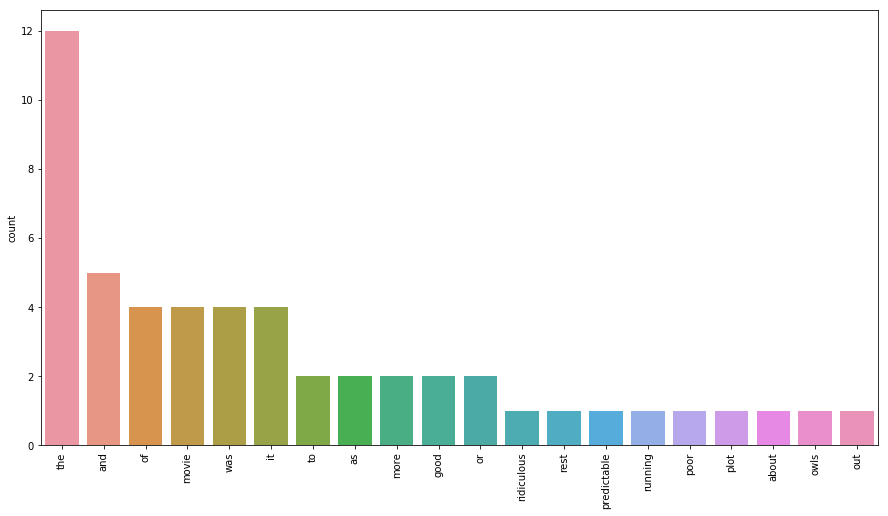

In [173]:
plt.figure(figsize=(15,8))
sns.barplot(x = word_total_counts_sorted_top.index,y=word_total_counts_sorted_top['count'])
plt.xticks(rotation=90,fontsize=10)
plt.show()

On définit une fonction qui prend en encapsule ce qui précède

In [174]:
def most_frequent_words(count_vect,data):    
    data_counts = count_vect.fit_transform(data)
    dictionary   = count_vect.get_feature_names()
    print("Taille du dictionnaire : ",len(dictionary))
    word_counts = pd.DataFrame(data_counts.toarray(),columns = dictionary)
    word_total_counts = pd.DataFrame()
    word_total_counts['count'] = word_counts.sum(axis=0)
    word_total_counts['word'] = dictionary
    word_total_counts_sorted_top  = word_total_counts.sort_values(by="count",ascending = False).iloc[0:20]
    plt.figure(figsize=(15,8))
    sns.barplot(x = word_total_counts_sorted_top.index,y=word_total_counts_sorted_top['count'])
    plt.xticks(rotation=90,fontsize=10)
    plt.show()
    return {'data_counts' : data_counts, 'word_total_counts' :word_total_counts, 'dictionary' : dictionary}

In [175]:
count_vect = CountVectorizer()
X_sub_counts = count_vect.fit_transform(X_sub)

Taille du dictionnaire :  97


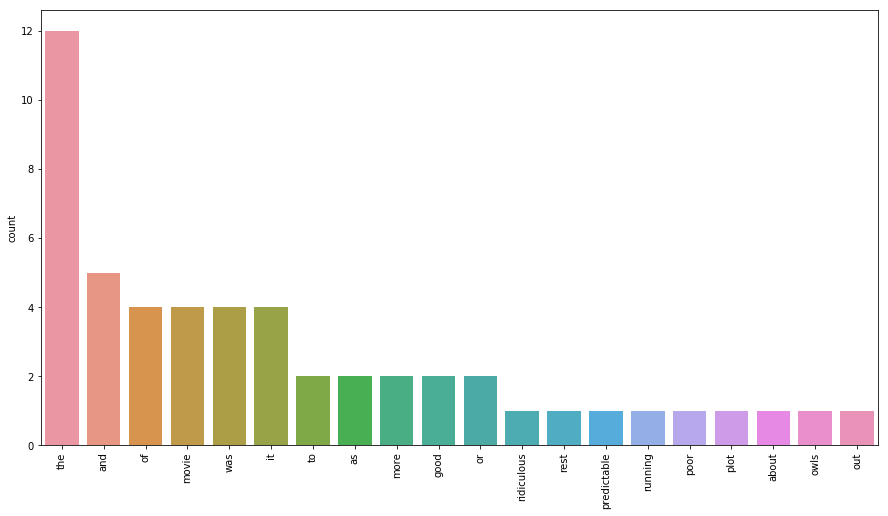

In [176]:
most_frequent_words_sub = most_frequent_words(count_vect,X_sub)

### Passage aux données complètes

In [177]:
X = df['sentence']

Taille du dictionnaire :  3044


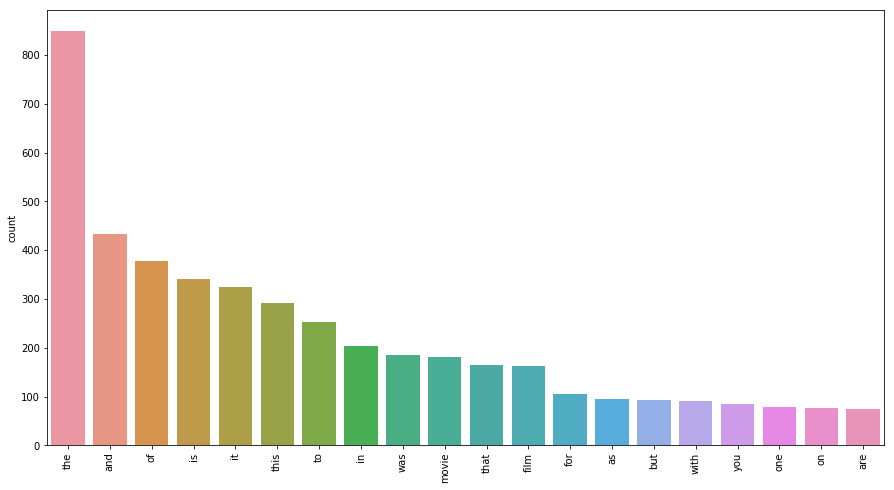

In [178]:
most_frequent_words_tot = most_frequent_words(count_vect,X)

Quels problèmes voyez-vous ?

## Préparation des données

### Miniscules UTF-8 sans ponctuation

Toujours vérifier que les mots sont en minuscule, qu'il n'a pas de signe de ponctuation, etc

### Stopwords

In [179]:
stop = set(stopwords.words('english')) 
print(stop)

{'been', 'down', 'on', "you'd", 'or', 'by', 't', 'ourselves', 'under', 'ma', 're', 'they', 'up', 'her', 'do', 'own', 'no', 'again', 's', 'now', 'mightn', "mustn't", 'are', 'whom', 'any', 'between', 'it', 'because', 'won', "you're", 'not', 'in', 'didn', 'he', 'while', 'myself', 'himself', 'the', 'all', "you'll", 'for', 'shan', 'at', "hasn't", 'above', "should've", 'm', 'only', 'of', 'aren', 've', 'more', 'hers', 'their', 'you', 'should', 'll', 'itself', "isn't", 'did', 'as', 'further', 'ain', "shouldn't", 'too', "wasn't", "didn't", 'against', 'wouldn', 'i', 'with', 'same', 'off', 'doesn', 'few', "mightn't", 'them', 'his', 'a', 'about', 'most', 'other', 'into', 'until', 'what', 'themselves', 'nor', 'each', 'during', "you've", 'shouldn', 'hasn', 'an', 'she', 'mustn', 'here', 'wasn', 'be', 'which', "haven't", 'am', 'why', 'has', 'over', 'isn', 'yourselves', 'before', 'your', 'there', 'weren', 'is', 'couldn', 'but', 'out', 'my', 'where', 'both', 'don', "aren't", 'some', 'than', 'this', "sha

Taille du dictionnaire :  2913


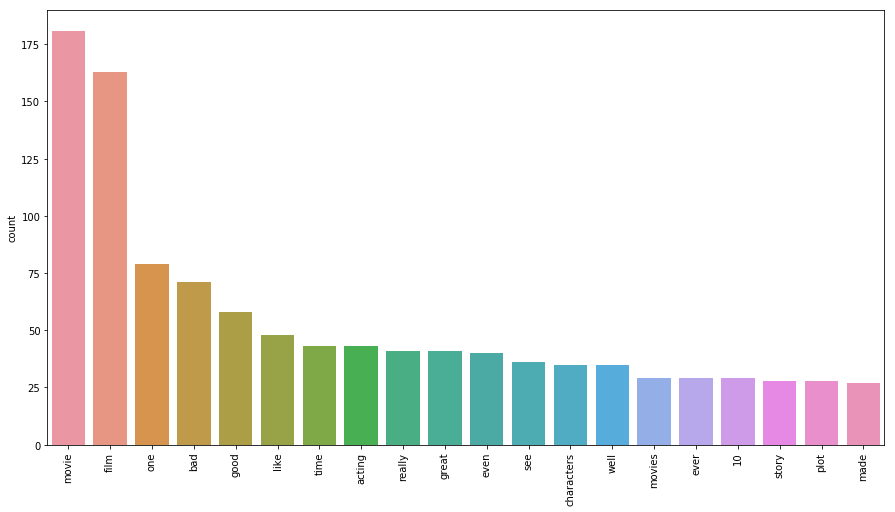

In [180]:
count_vect_sw = CountVectorizer(stop_words=stop)
most_frequent_words_sw = most_frequent_words(count_vect_sw,X)

### Visualisation du corpus

In [181]:
most_frequent = np.array(most_frequent_words_sw['data_counts'].toarray())
hist = most_frequent / most_frequent.sum(axis=1)[:,None]

In [182]:
hist[np.argsort(df['label']),:]

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.33333333, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

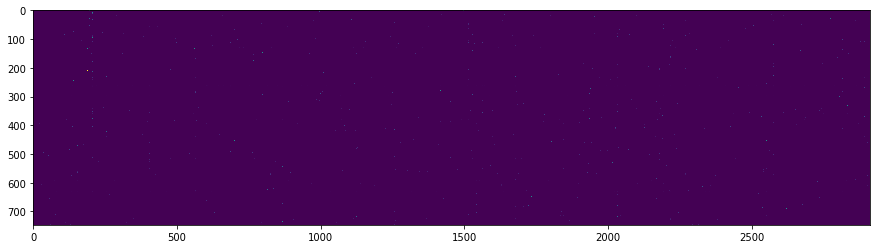

In [183]:
plt.figure(figsize=(15,8))
plt.imshow(hist[np.argsort(df['label']),:])
#plt.colorbar()

### Avec TF_IDF

In [184]:
transformer = TfidfTransformer(smooth_idf=False)
transformer

TfidfTransformer(norm='l2', smooth_idf=False, sublinear_tf=False,
         use_idf=True)

In [185]:
tf_idf_transf = transformer.fit_transform(most_frequent_words_sw['data_counts'])

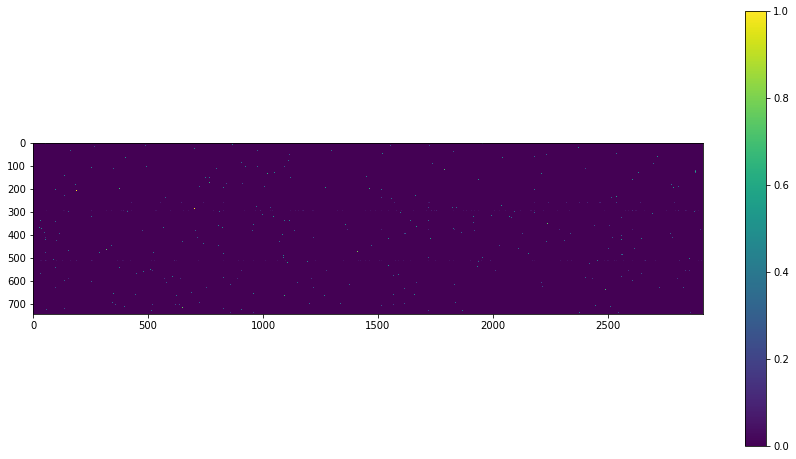

In [218]:
plt.figure(figsize=(15,8))
plt.imshow(tf_idf_transf.toarray()[np.argsort(df['label']),:])
plt.colorbar()

## Apprentissage supervisé

### Sur les counts

In [187]:
NB_counts = MultinomialNB()
NB_counts.fit(X=most_frequent_words_sw['data_counts'],y=df['label'])
accuracy_score(NB_counts.predict(most_frequent_words_sw['data_counts']),df['label'])

0.9665327978580991

### Sur le TF-IDF

In [188]:
NB_tfidf = GaussianNB()
NB_tfidf.fit(X=tf_idf_transf.toarray(),y=df['label'])
accuracy_score(NB_tfidf.predict(tf_idf_transf.toarray()),df['label'])

0.9665327978580991

In [189]:
df['prediction_counts'] = NB_counts.predict(most_frequent_words_sw['data_counts'])

In [190]:
df['prediction_tfidf'] = NB_tfidf.predict(tf_idf_transf.toarray())

In [191]:
df[df['prediction_tfidf'] != df['label']]

,sentence,label,prediction_counts,prediction_tfidf
23,Give this one a look.,1,1,0
38,I don't think you will be disappointed.,1,0,0
58,A great film by a great director.,1,1,0
63,10/10,1,1,0
163,Everything from acting to cinematography was s...,1,1,0
250,"I won't say any more - I don't like spoilers, ...",1,1,0
293,But this movie really got to me.,1,1,0
294,See it.,1,1,0
312,The cast is good.,1,1,0
332,the cast was great.,1,1,0


In [192]:
df[df['prediction_counts'] != df['label']]

,sentence,label,prediction_counts,prediction_tfidf
20,If there was ever a movie that needed word-of-...,1,0,1
38,I don't think you will be disappointed.,1,0,0
49,The directing and the cinematography aren't qu...,0,1,0
76,"I saw ""Mirrormask"" last night and it was an un...",0,1,0
123,Highly unrecommended.,0,1,0
131,There were too many close ups.,0,1,0
142,It even has its sweet moments.,1,0,1
175,"If you see it, you should probably just leave ...",0,1,0
235,1/10 - and only because there is no setting fo...,0,1,0
244,The last 15 minutes of movie are also not bad ...,1,0,1


In [214]:
NB_logistic = SGDClassifier(loss='hinge', penalty='l2',\
                           alpha=1e-3, random_state=42,\
                           max_iter=5, tol=None)
logistic_fit = NB_logistic.fit(X=tf_idf_transf.toarray(),y=df['label'])
accuracy_score(NB_logistic.predict(tf_idf_transf.toarray()),df['label'])

0.9866131191432396

In [215]:
print("Mots avec le coeff le plus négatif : ", most_frequent_words_sw['dictionary'][np.argsort(NB_logistic.coef_)[0][0]])
print("Mots avec le coeff le plus positif : ", most_frequent_words_sw['dictionary'][np.argsort(NB_logistic.coef_)[0][-1]])

207
Mots avec le coeff le plus négatif :  bad
Mots avec le coeff le plus positif :  wonderful


### Avec une pipeline

In [193]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', SGDClassifier(loss='hinge', penalty='l2',\
                           alpha=1e-3, random_state=42,\
                           max_iter=5, tol=None)),])

In [194]:
text_clf.fit(X,df['label'])#
accuracy_score(text_clf.predict(X),df['label'])

0.9825970548862115

## Jeu de données complet

Dataset of 25,000 movies reviews from IMDB, labeled by sentiment (positive/negative). Reviews have been preprocessed, and each review is encoded as a sequence of word indexes (integers). For convenience, words are indexed by overall frequency in the dataset, so that for instance the integer "3" encodes the 3rd most frequent word in the data. This allows for quick filtering operations such as: "only consider the top 10,000 most common words, but eliminate the top 20 most common words".

In [90]:
(X_train, y_train), (X_test, y_test) = imdb.load_data()

In [5]:
np.unique(y)

array([0, 1])

### Les textes ont été hashés

In [116]:
X_train[0:2]

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1

### On essaie de reconstruire le 6-ième texte

In [112]:
def getKeysByValue(dictOfElements, valueToFind):
    listOfKeys = list()
    listOfItems = dictOfElements.items()
    for item  in listOfItems:
        if item[1] == valueToFind:
            listOfKeys.append(item[0])
    print(listOfKeys)

In [115]:
for word_num in X_train[5]:
    getKeysByValue(imdb.get_word_index(),word_num)

['the']
['effort']
['still']
['been']
['that']
['usually']
['makes']
['for']
['of']
['finished']
['sucking']
['ended']
["cbc's"]
['an']
['because']
['before']
['if']
['just']
['though']
['something']
['know']
['novel']
['female']
['i']
['i']
['slowly']
['lot']
['of']
['above']
['freshened']
['with']
['connect']
['in']
['of']
['script']
['their']
['that']
['out']
['end']
['his']
['deceptively']
['i']
['i']


In [7]:
X_train.shape

(25000,)